In [7]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

In [10]:
tickers=['SBUX','AMZN','TSLA','AAPL','META']

In [11]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [13]:
data = pdr.get_data_yahoo(tickers, start="2018-01-01",end=dt.date.today())['Adj Close']

In [14]:
 data

Symbols,SBUX,AMZN,TSLA,AAPL,META
Date,,,,,
2018-01-02,52.350155,59.450500,21.368668,41.018425,181.419998
2018-01-03,53.331200,60.209999,21.150000,41.011288,184.669998
2018-01-04,53.531052,60.479500,20.974667,41.201775,184.330002
2018-01-05,54.148754,61.457001,21.105333,41.670868,186.850006
2018-01-08,53.876236,62.343498,22.427334,41.516102,188.279999
...,...,...,...,...,...
2022-10-24,83.760002,119.820000,211.250000,149.449997,129.720001
2022-10-25,85.209999,120.599998,222.419998,152.339996,137.509995
2022-10-26,85.889999,115.660004,224.639999,149.350006,129.820007


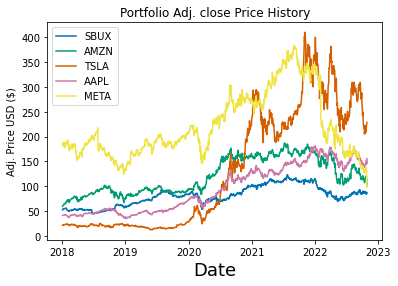

In [15]:
title = 'Portfolio Adj. close Price History'
my_stocks = data
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)')
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [17]:
returns = data.pct_change()
returns

Symbols,SBUX,AMZN,TSLA,AAPL,META
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.018740,0.012775,-0.010233,-0.000174,0.017914
2018-01-04,0.003747,0.004476,-0.008290,0.004645,-0.001841
2018-01-05,0.011539,0.016163,0.006230,0.011385,0.013671
2018-01-08,-0.005033,0.014425,0.062638,-0.003714,0.007653
...,...,...,...,...,...
2022-10-24,-0.054734,0.004190,-0.014876,0.014803,-0.002231
2022-10-25,0.017311,0.006510,0.052876,0.019338,0.060052
2022-10-26,0.007980,-0.040962,0.009981,-0.019627,-0.055923


In [18]:
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

Symbols,SBUX,AMZN,TSLA,AAPL,META
Symbols,,,,,
SBUX,0.095739,0.048236,0.071320,0.055413,0.060704
AMZN,0.048236,0.124507,0.098947,0.075186,0.092468
TSLA,0.071320,0.098947,0.425503,0.100754,0.096567
AAPL,0.055413,0.075186,0.100754,0.110680,0.082856
META,0.060704,0.092468,0.096567,0.082856,0.182949


In [19]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.10017117048723623

In [20]:
port_volatility=np.sqrt(port_variance)
port_volatility

0.3164982946039934

In [21]:
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.267240225606304

In [22]:
percent_var = str(round(port_variance, 2)*100)+"%"
percent_vols = str(round(port_volatility, 2)*100)+"%"
percent_ret = str(round(portfolio_simple_annual_return, 2)*100)+"%"

print('Expected annual return :'+percent_ret)
print('Annual volatility / risk :'+percent_vols)
print('Annual variance :'+percent_var)

Expected annual return :27.0%
Annual volatility / risk :32.0%
Annual variance :10.0%


In [23]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 820 kB/s eta 0:00:011
     |████████████████████████████████| 18.1 MB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 880 kB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.4 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 7.8 MB/s eta 0:00:011
     |████████████████████████████████| 249 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 9.8 MB/s  eta 0:00:01
     |████████████████████████████████| 17.7 MB 12.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have nu